# 🎓 Actividad: ¿Qué tan representativa es una muestra aleatoria?

**Objetivo:** Aplicar Muestreo Aleatorio Simple (MAS) sobre un conjunto real de datos para estimar la calificación promedio de las películas y evaluar la precisión de la estimación.

Dataset: [IMDb Top 1000 Movies](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv)

- Variables: `title`, `genre`, `year`, `runtime`, `rating`
- Fuente: GitHub público


In [1]:
# ⏱️ Parte 1: Cargar y explorar los datos
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv"
df = pd.read_csv(url)
print(df.head())
print(df['star_rating'].describe())

   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  
count    979.000000
mean       7.889785
std        0.336069
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        9.300000
Name: star_rating, dtype: float64


In [3]:
# ⏱️ Parte 2: Aplicar el Muestreo Aleatorio Simple
import numpy as np
N = df.shape[0]
n = 100
muestra = df.sample(n=n, random_state=42)
media_muestral = muestra['star_rating'].mean()
var_muestral = muestra['star_rating'].var(ddof=1)
f = n / N
se = np.sqrt((1 - f) * var_muestral / n)
print(f"Media estimada de calificación: {media_muestral:.2f}")
print(f"Error estándar: {se:.3f}")

Media estimada de calificación: 7.89
Error estándar: 0.029


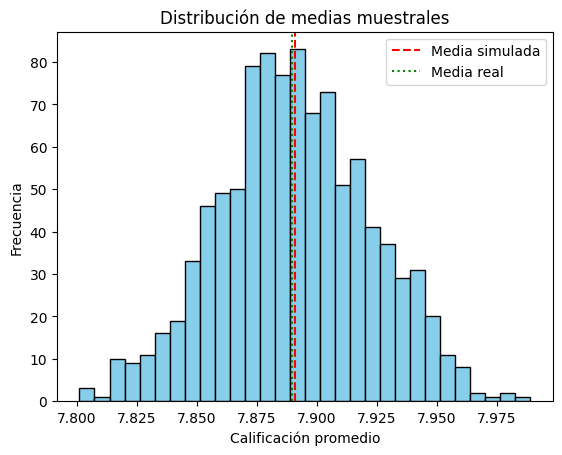

In [4]:
# ⏱️ Parte 3: Simular varias muestras
import matplotlib.pyplot as plt
medias = []
for i in range(1000):
    muestra_i = df.sample(n=n, replace=False)
    medias.append(muestra_i['star_rating'].mean())
plt.hist(medias, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(medias), color='red', linestyle='dashed', label='Media simulada')
plt.axvline(df['star_rating'].mean(), color='green', linestyle='dotted', label='Media real')
plt.title("Distribución de medias muestrales")
plt.xlabel("Calificación promedio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

### 📋 Preguntas para reflexionar
1. ¿Qué tan cerca estuvo la media muestral de la media poblacional?
2. ¿Qué observas en la distribución de las 1000 medias simuladas?
3. ¿Qué efecto tendría aumentar el tamaño de la muestra a \( n = 300 \)?
4. ¿Qué pasaría si usamos un muestreo no aleatorio (como las 100 primeras películas)?